In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 448s 3us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
#there are 3 color channels (r,g,b) for each pixel
# the image matrix is reperesnted in terms of intensity for each color channel
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

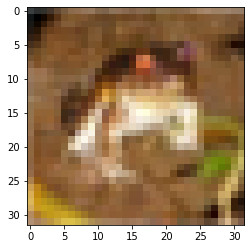

In [7]:
plt.imshow(X_train[0])

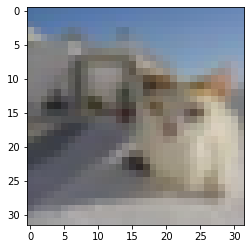

In [13]:
plt.imshow(X_train[80])

In [15]:
X_train.max()

255

In [16]:
#scale the data so that it is in the range from 0-1
#run it only once so that you do not mess up the values

In [17]:
X_train = X_train/255

In [18]:
X_test = X_test/255

In [19]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

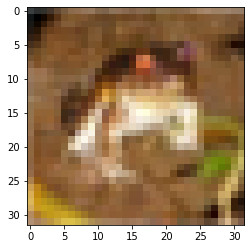

In [20]:
plt.imshow(X_train[0])

In [21]:
y_train[0]

array([6], dtype=uint8)

In [22]:
#the lables are categorically named according to this list 
#https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c
# airplane : 0
# automobile : 1
# bird : 2
# cat : 3
# deer : 4
# dog : 5
# frog : 6
# horse : 7
# ship : 8
# truck : 9

In [23]:
# convert the labels to categorical data so that the model does not predict regression values

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
y_cat_train = to_categorical(y_train)

In [26]:
y_cat_test = to_categorical(y_test)

In [27]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [28]:
#building the model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
model = Sequential()

In [31]:
# calculate the no of pixels
32*32*3
#since there are a lot of pixels or a lot of data to consider add more than 1 convolution layer
#even no of pixels so no need for padding

3072

In [32]:
#input layer is a conv layer and the input shape must be same as the size of the image
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

#best to have units in the powers of 2
model.add(Dense(256,activation='relu'))
#o/p layer with softmax function for the probability distribution
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [36]:
#make sure to train on the categorical labels
#enter the callbacks in a list
model.fit(X_train,y_cat_train,epochs=15,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 42s 845us/sample - loss: 1.4995 - accuracy: 0.4582 - val_loss: 1.3374 - val_accuracy: 0.5231
Epoch 2/15
50000/50000 [==============================] - 44s 877us/sample - loss: 1.1937 - accuracy: 0.5769 - val_loss: 1.1372 - val_accuracy: 0.5968
Epoch 3/15
50000/50000 [==============================] - 42s 831us/sample - loss: 1.0561 - accuracy: 0.6289 - val_loss: 1.0728 - val_accuracy: 0.6223
Epoch 4/15
50000/50000 [==============================] - 40s 798us/sample - loss: 0.9546 - accuracy: 0.6659 - val_loss: 1.0164 - val_accuracy: 0.6434
Epoch 5/15
50000/50000 [==============================] - 41s 816us/sample - loss: 0.8691 - accuracy: 0.6962 - val_loss: 0.9806 - val_accuracy: 0.6572
Epoch 6/15
50000/50000 [==============================] - 42s 847us/sample - loss: 0.7905 - accuracy: 0.7239 - val_loss: 0.9975 - val_accuracy: 0.6618


In [37]:
model.history.history

{'loss': [1.4995001434326172,
  1.1936555614852906,
  1.0560733386993408,
  0.9545754834747314,
  0.869106821899414,
  0.7904723417282105],
 'accuracy': [0.4582, 0.57694, 0.62892, 0.6659, 0.69616, 0.72394],
 'val_loss': [1.3373668193817139,
  1.1371917579650879,
  1.0727847116470337,
  1.0163946821212768,
  0.9806077031135559,
  0.9974956708908082],
 'val_accuracy': [0.5231, 0.5968, 0.6223, 0.6434, 0.6572, 0.6618]}

In [38]:
df = pd.DataFrame(model.history.history)

In [39]:
df

,loss,accuracy,val_loss,val_accuracy
0,1.499500,0.45820,1.337367,0.5231
1,1.193656,0.57694,1.137192,0.5968
2,1.056073,0.62892,1.072785,0.6223
3,0.954575,0.66590,1.016395,0.6434
4,0.869107,0.69616,0.980608,0.6572
5,0.790472,0.72394,0.997496,0.6618


In [40]:
df[['loss','val_loss']]

,loss,val_loss
0,1.499500,1.337367
1,1.193656,1.137192
2,1.056073,1.072785
3,0.954575,1.016395
4,0.869107,0.980608
5,0.790472,0.997496


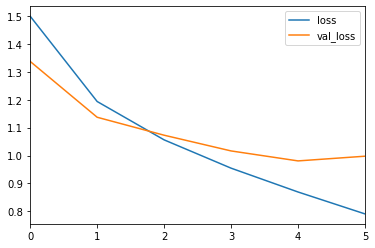

In [41]:
df[['loss','val_loss']].plot()

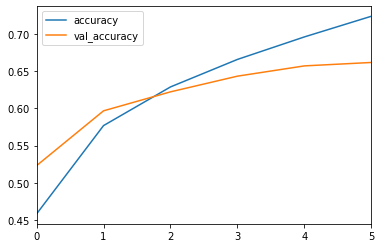

In [42]:
df[['accuracy','val_accuracy']].plot()

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
y_pred = model.predict_classes(X_test)

In [46]:
y_pred.shape

(10000,)

In [56]:
y_pred.reshape(10000,1)

array([[3],
       [8],
       [1],
       ...,
       [5],
       [1],
       [7]], dtype=int64)

In [62]:
pd.concat([pd.DataFrame(y_test.reshape(10000,1),columns=['y_test']),pd.DataFrame(y_pred.reshape(10000,1),columns=['y_pred'])],axis=1)

,y_test,y_pred
0,3,3
1,8,8
2,8,1
3,0,0
4,6,4
...,...,...
9995,8,3
9996,3,3
9997,5,5
9998,1,1


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1000
           1       0.66      0.89      0.76      1000
           2       0.56      0.58      0.57      1000
           3       0.48      0.50      0.49      1000
           4       0.68      0.52      0.59      1000
           5       0.53      0.60      0.56      1000
           6       0.79      0.70      0.74      1000
           7       0.72      0.72      0.72      1000
           8       0.84      0.68      0.75      1000
           9       0.73      0.72      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [64]:
#the model has trouble predicting cats,dogs,birds

In [65]:
print(confusion_matrix(y_test,y_pred))

[[705  63  64  16  19   4   6  13  54  56]
 [ 12 891   5   9   0   6   6   3  11  57]
 [ 61  21 581  77  59  96  52  29  11  13]
 [ 27  35  63 501  48 205  41  51   7  22]
 [ 24  10 118  92 524  80  50  81  14   7]
 [ 12  18  63 179  29 598  20  68   5   8]
 [  8  26  75  92  31  38 700  13   6  11]
 [ 18  16  28  44  47  87   8 717   2  33]
 [ 96 100  20  20  10  10   1   5 676  62]
 [ 16 178  13  18   2  11   6  12  19 725]]


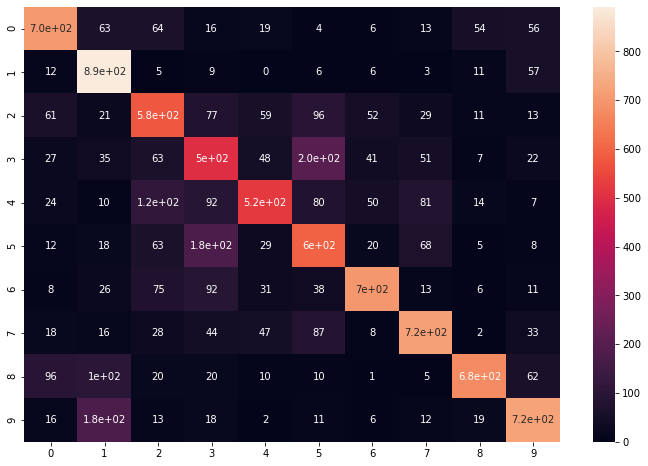

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [69]:
#we are able to analyse the model predictions using the above heatmap and the labels
# airplane : 0
# automobile : 1
# bird : 2
# cat : 3
# deer : 4
# dog : 5
# frog : 6
# horse : 7
# ship : 8
# truck : 9

In [70]:
#the model gets confused in predicting cats and dogs

In [71]:
#new predictions

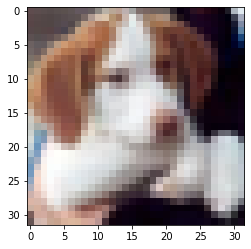

In [82]:
plt.imshow(X_test[16])

In [83]:
X_test[16].shape

(32, 32, 3)

In [84]:
# make sure to reshape the data to (nos_images,width,height,color_channels)
model.predict_classes(X_test[16].reshape(1,32,32,3))

array([5], dtype=int64)

In [ ]:
#correct prediction of a dog!

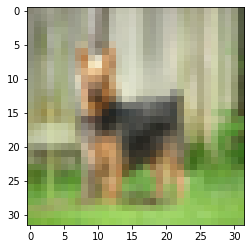

In [85]:
plt.imshow(X_test[24])

In [86]:
model.predict_classes(X_test[24].reshape(1,32,32,3))

array([4], dtype=int64)

In [87]:
#oh no predicted it as a deer

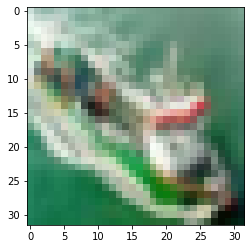

In [108]:
plt.imshow(X_test[15])

In [109]:
model.predict_classes(X_test[15].reshape(1,32,32,3))

array([8], dtype=int64)

In [110]:
#yay predicted ship!!

In [111]:
#overall accuracy of model is 66%

In [112]:
model.save('ps_cifar_model.h5')